<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Projeto semestral classificador de imagem**
---

Atenção, podem ser que nem todas as tarefas sejam executadas no Colab (a aplicação por exemplo, pode estar hospedada no streamlit cloud). Mas a maior parte pode estar aqui ou ao menos indicada e comentada.


Além disso a entrega deve incluir:

1. **Um GitHub público do projeto**
2. **Código completo e executável em um notebook Python (este template)**
3. **Uma aplicação streamlit para consumo do modelo**
4. **Um texto/artigo do projeto**
5. **Um vídeo (link YouTube ou outro) de no máximo 3min de apresentação do projeto**

Um **`readme.md`** no GitHub público do projeto deve indicar (um índice) cada uma dessas entregas.








In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10364987, Enzo Ryo Maeda Kanbayashi' #@param {type:"string"}
Aluno2 = 'None' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



In [ ]:
#@title Assinale aqui a sua opção de Projeto
Projeto = "IA Aplicada a Imagens: Uso de Modelos de Redes Neurais" #@param ["IA Aplicada a Imagens: Uso de Modelos de Redes Neurais", "IA Aplicada a Documentos: Uso de Grandes Modelos de Linguagem Abertos"]




##Github do Projeto
https://github.com/enzomaeda1/Projeto-IA-Classificador-de-imagem


##App Streamlit
https://projeto-ia-classificador-de-imagem-vuibtqtccwfdmhvfqercvf.streamlit.app/


##Video do Youtube
https://www.youtube.com/watch?v=EwU4xmixejc&ab_channel=EnzoMaeda

# **Resumo**

**1. Objetivo do projeto**

O objetivo deste projeto é desenvolver um modelo de inteligência artificial capaz de classificar imagens em duas categorias: gatos e cães. A proposta é construir uma solução eficiente e precisa utilizando técnicas de deep learning e redes neurais convolucionais, permitindo que o sistema reconheça corretamente a espécie presente em imagens fornecidas pelo usuário.

**2. Fontes dos dados e dados originais (coletados)**

Os dados utilizados neste projeto foram obtidos a partir do dataset Cats and Dogs, disponível na plataforma Kaggle no seguinte link: https://www.kaggle.com/datasets/marquis03/cats-and-dogs. O conjunto de dados está organizado em pastas com imagens divididas por classe (gatos e cães) e foi essencial para treinar, validar e testar o modelo de classificação binária proposto.

**3. Ferramentas/pacotes de IA a serem utilizados para a construção da solução**

* Ferramentas/pacotes de IA a serem utilizados para a construção da solução

* Para a construção da solução, foram utilizadas as seguintes ferramentas e pacotes de inteligência artificial:

* TensorFlow e Keras para criação, treinamento e avaliação do modelo de rede neural;

* MobileNetV2 como base de rede pré-treinada (transfer learning), com fine-tuning;

* Matplotlib e NumPy para visualização e manipulação de dados;

* Streamlit para desenvolvimento de uma interface web interativa que permita ao usuário carregar imagens e receber previsões do modelo em tempo real.

**4. Uma prévia dos resultados.**

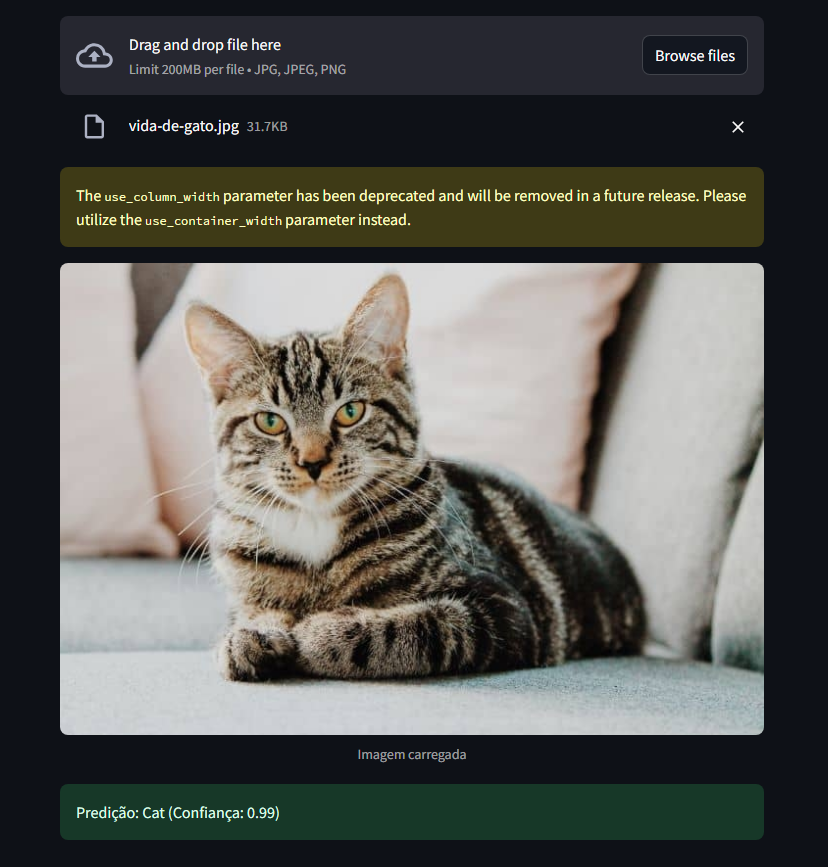

# **Apresentação dos dados**

Para a realização deste projeto, utilizei o conjunto de dados Cats and Dogs, disponível na plataforma Kaggle por meio do seguinte link: https://www.kaggle.com/datasets/marquis03/cats-and-dogs. Esse dataset contém imagens organizadas em duas classes principais — gatos e cães — e foi fundamental para o treinamento e validação do modelo de classificação binária desenvolvido ao longo do trabalho.

# Abaixo algumas seções de exemplo



Aqui podemos ver um exemplo de um teste do modelo classificando imagens de gatos.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9623 - loss: 0.0624

 Val accuracy: 97.14% | Val loss: 0.0519
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


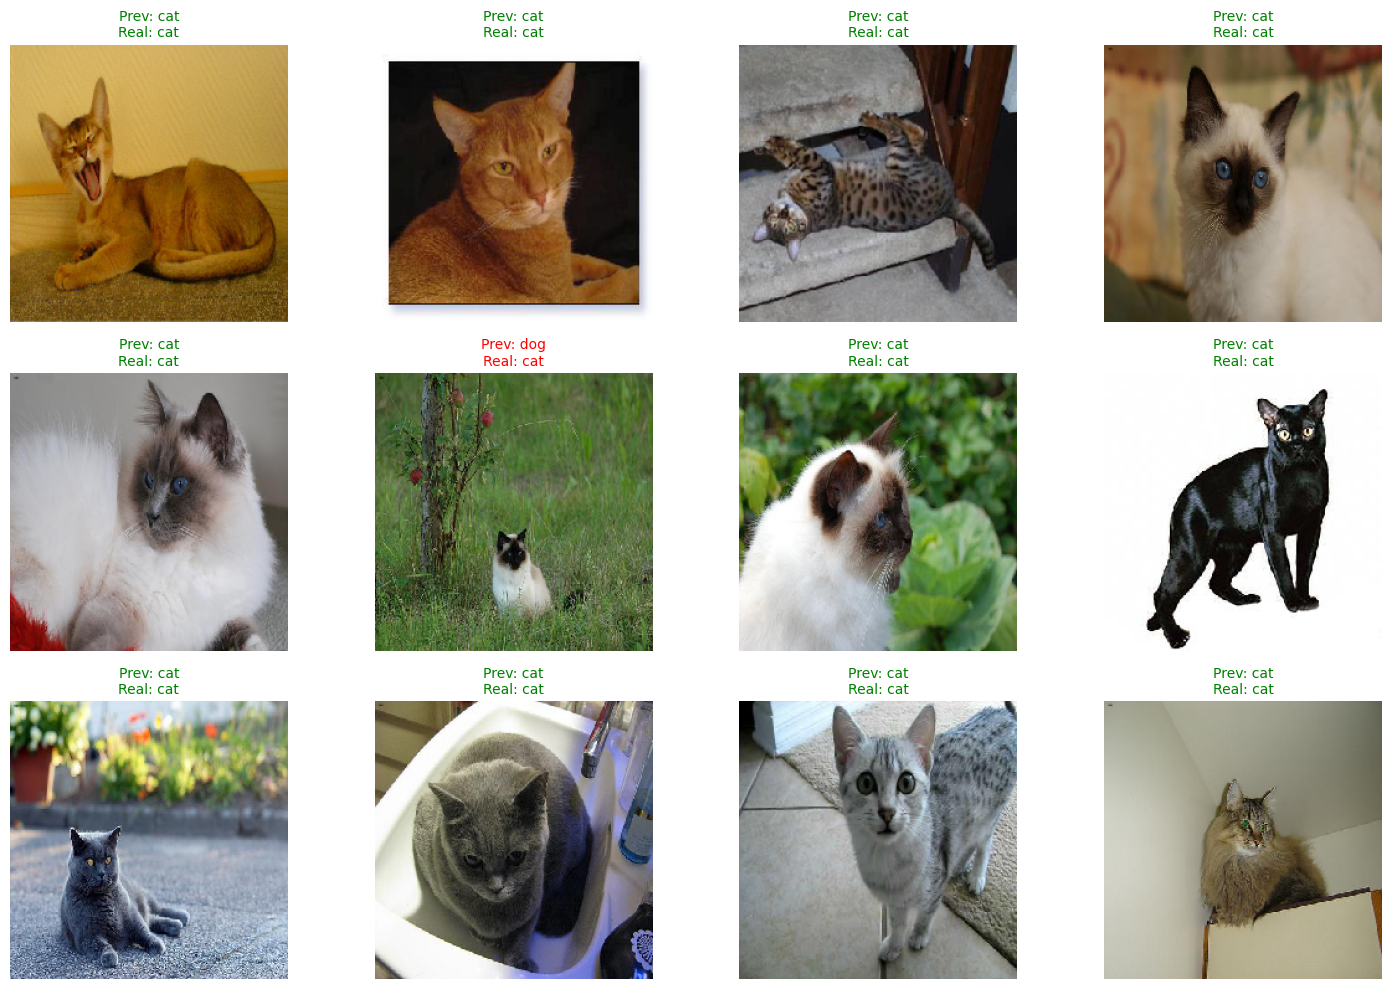

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Avaliação no conjunto de validação
loss, acc = model.evaluate(val_ds, verbose=1)
print(f"\n Val accuracy: {acc*100:.2f}% | Val loss: {loss:.4f}")

# Mapeia os índices para os nomes das classes
class_names = list(val_ds.class_indices.keys())  # ['Cat', 'Dog']

# Obtem um batch de imagens
images, labels = next(iter(val_ds))
pred_probs = model.predict(images)
pred_labels = (pred_probs > 0.5).astype("int32").squeeze()

plt.figure(figsize=(15, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    img = images[i]

    pred_class = class_names[pred_labels[i]]
    true_class = class_names[int(labels[i])]

    color = "green" if pred_class == true_class else "red"
    ax.set_title(f"Prev: {pred_class}\nReal: {true_class}", color=color, fontsize=10)
    plt.imshow((img * 255).astype("uint8"))
    plt.axis("off")
plt.tight_layout()
plt.show()

# **Preparação e transformação dos dados**



In [ ]:
#imports
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import kagglehub

# Baixar o dataset de cães e gatos
path = kagglehub.dataset_download("marquis03/cats-and-dogs")
print("Path to dataset files:", path)

# Diretórios esperados
train_dir = os.path.join(path, "train")
val_dir = os.path.join(path, "val")

Path to dataset files: /home/enzo/.cache/kagglehub/datasets/marquis03/cats-and-dogs/versions/2


In [ ]:
# Parâmetros
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Geradores
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Carregamento dos dados
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

val_ds = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 275 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


# **Fine Tuning do modelo**


In [ ]:
# MobileNetV2 base
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # congelar pesos do modelo base

# Topo do modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(1, activation='sigmoid')(x)

# Modelo completo
model = Model(inputs=base_model.input, outputs=output)

I0000 00:00:1748703434.507449     462 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5592 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Ti, pci bus id: 0000:05:00.0, compute capability: 8.6


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.6481 - loss: 0.6414

2025-05-31 11:59:04.705300: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1160', 204 bytes spill stores, 204 bytes spill loads

2025-05-31 11:59:04.823390: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1160_0', 464 bytes spill stores, 1372 bytes spill loads

2025-05-31 11:59:05.266549: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1160', 5340 bytes spill stores, 5324 bytes spill loads

2025-05-31 11:59:05.399989: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1160', 5616 bytes spill stores, 5612 bytes spill loads

2025-05-31 11:59:06.78026

9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6535 - loss: 0.6350 - val_accuracy: 0.8000 - val_loss: 0.5052
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.6845 - loss: 0.5243 - val_accuracy: 0.9143 - val_loss: 0.3744
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.7488 - loss: 0.4946 - val_accuracy: 0.9286 - val_loss: 0.2877
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - accuracy: 0.9305 - loss: 0.2886 - val_accuracy: 0.9429 - val_loss: 0.2294
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.9425 - loss: 0.2473 - val_accuracy: 0.9571 - val_loss: 0.1897
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 254ms/step - accuracy: 0.9536 - loss: 0.1967 - val_accuracy: 0.9571 - val_loss: 0.1604
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.9339 - loss: 0.2020 - val_accuracy: 0.9714 - val_loss: 0.1365
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.9436 - loss: 0.1730 - val_accuracy: 0.9714 - val_loss: 0.1182
Epoch

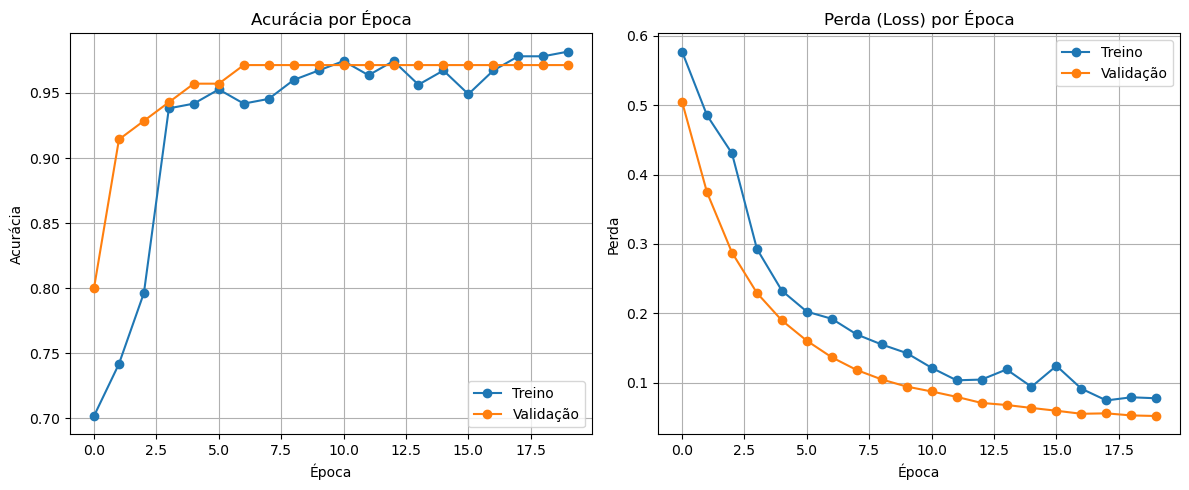

In [ ]:
import matplotlib.pyplot as plt

# Compilação
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Treinamento
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop],
    verbose=1
)

# Plotando Acurácia
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino', marker='o')
plt.plot(history.history['val_accuracy'], label='Validação', marker='o')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)

# Plotando Perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino', marker='o')
plt.plot(history.history['val_loss'], label='Validação', marker='o')
plt.title('Perda (Loss) por Época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# **Avaliação do modelo**



In [ ]:
# Avaliação
loss, acc = model.evaluate(val_ds)
print(f"\n🔍 Acurácia na validação: {acc*100:.2f}% | Perda: {loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9623 - loss: 0.0624

🔍 Acurácia na validação: 97.14% | Perda: 0.0519


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9623 - loss: 0.0624

 Val accuracy: 97.14% | Val loss: 0.0519
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


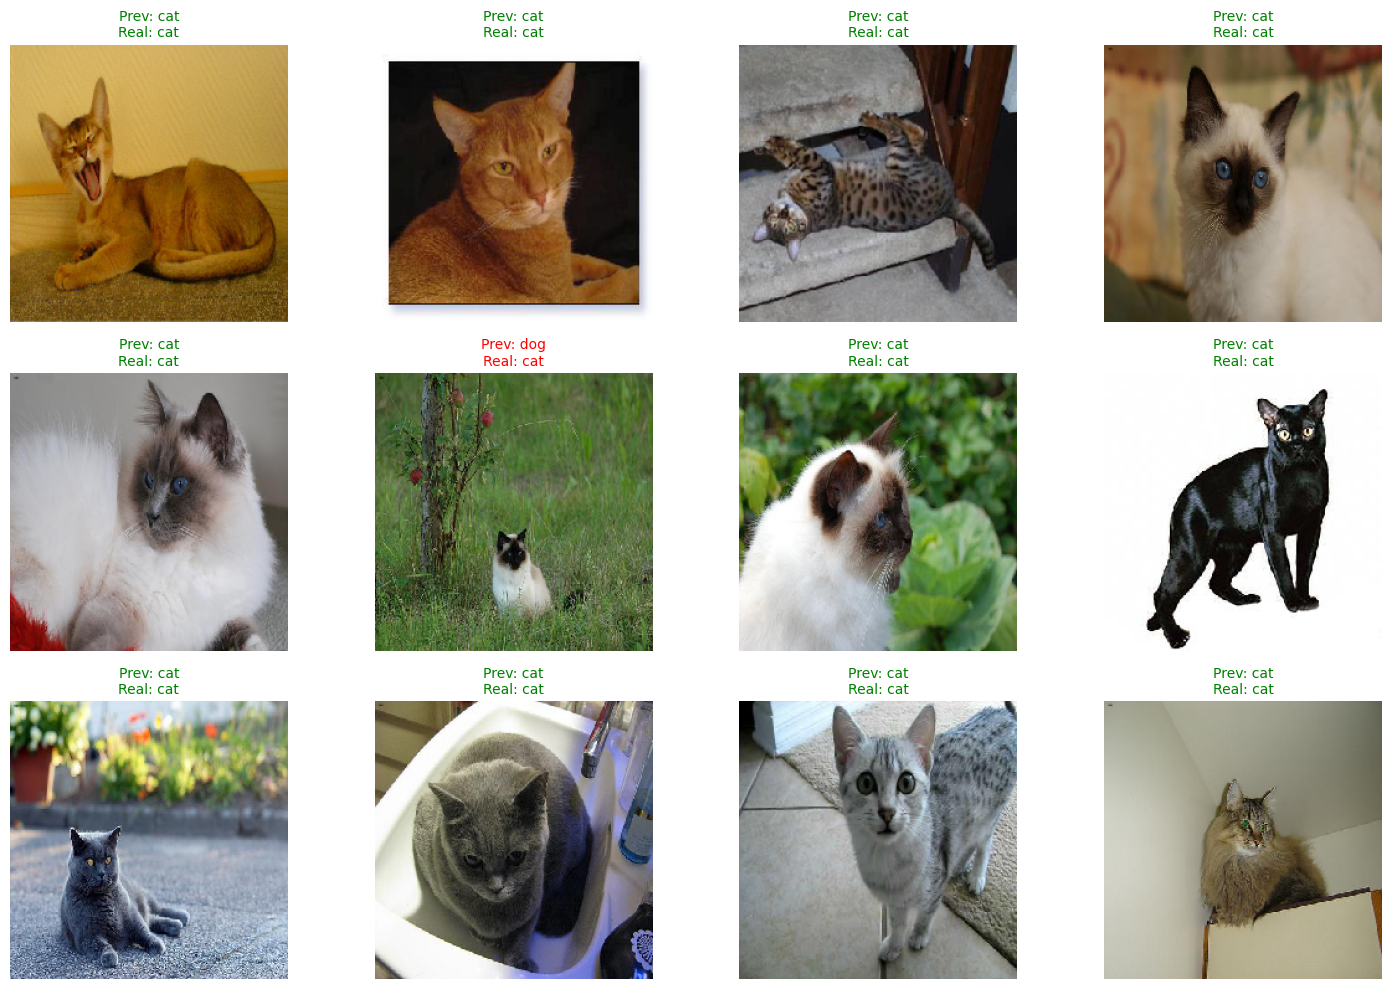

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Avaliação no conjunto de validação
loss, acc = model.evaluate(val_ds, verbose=1)
print(f"\n Val accuracy: {acc*100:.2f}% | Val loss: {loss:.4f}")

# Mapeia os índices para os nomes das classes
class_names = list(val_ds.class_indices.keys())  # ['Cat', 'Dog']

# Obtem um batch de imagens
images, labels = next(iter(val_ds))
pred_probs = model.predict(images)
pred_labels = (pred_probs > 0.5).astype("int32").squeeze()

plt.figure(figsize=(15, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    img = images[i]

    pred_class = class_names[pred_labels[i]]
    true_class = class_names[int(labels[i])]

    color = "green" if pred_class == true_class else "red"
    ax.set_title(f"Prev: {pred_class}\nReal: {true_class}", color=color, fontsize=10)
    plt.imshow((img * 255).astype("uint8"))
    plt.axis("off")
plt.tight_layout()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9623 - loss: 0.0624 

 Val accuracy: 97.14% | Val loss: 0.0519
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


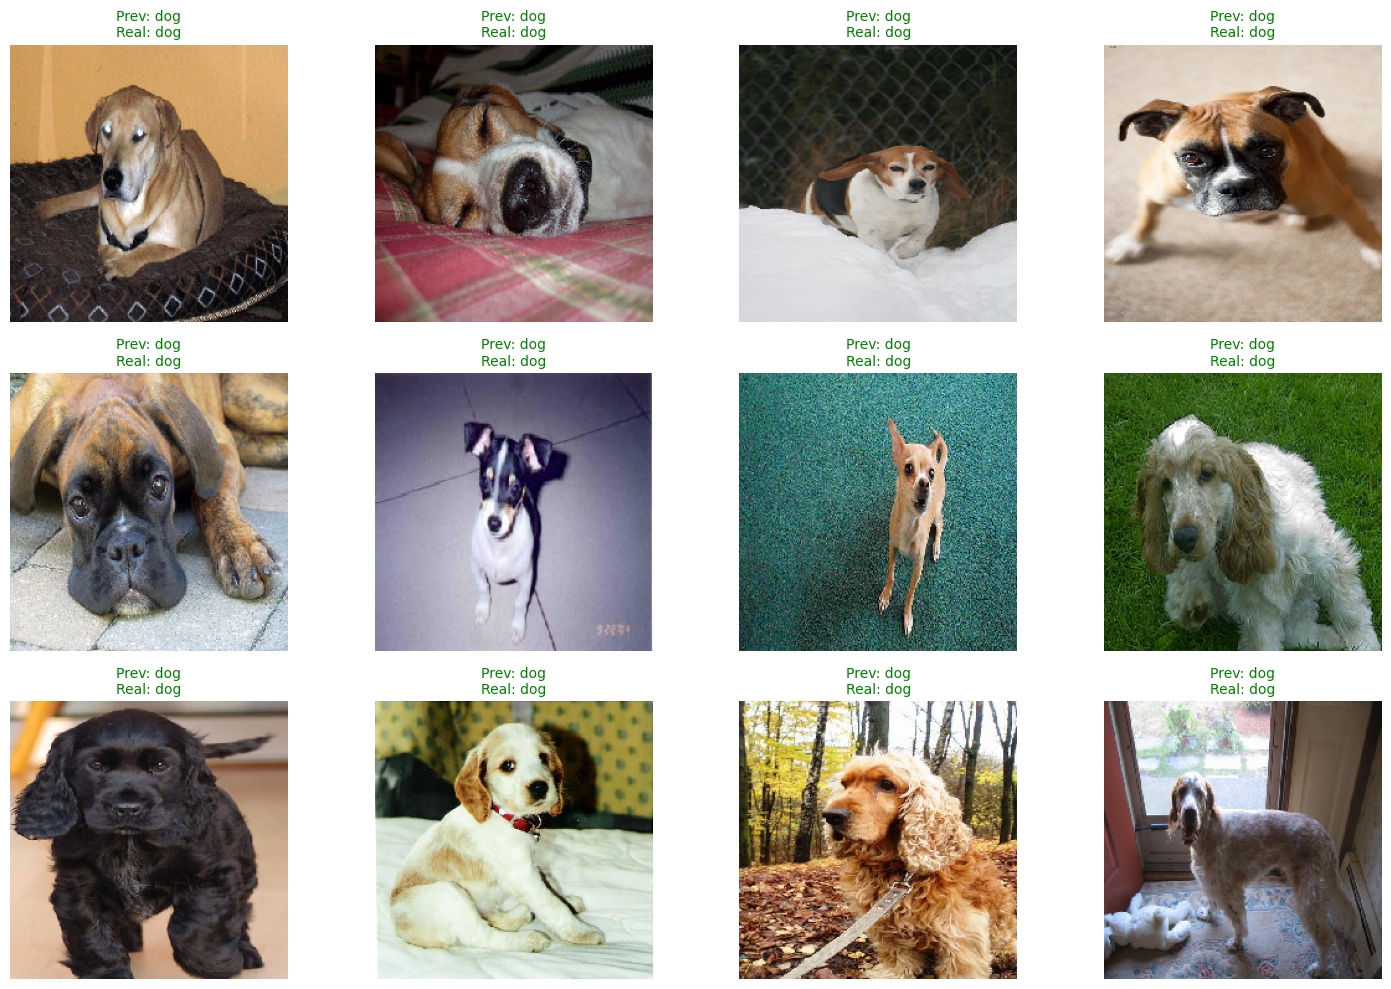

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Avaliação no conjunto de validação
loss, acc = model.evaluate(val_ds, verbose=1)
print(f"\n Val accuracy: {acc*100:.2f}% | Val loss: {loss:.4f}")

# Mapeia os índices para os nomes das classes
class_names = list(val_ds.class_indices.keys())  # ['Cat', 'Dog']

# Obtem um batch de imagens
images, labels = next(iter(val_ds))
pred_probs = model.predict(images)
pred_labels = (pred_probs > 0.5).astype("int32").squeeze()

plt.figure(figsize=(15, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    img = images[i]

    pred_class = class_names[pred_labels[i]]
    true_class = class_names[int(labels[i])]

    color = "green" if pred_class == true_class else "red"
    ax.set_title(f"Prev: {pred_class}\nReal: {true_class}", color=color, fontsize=10)
    plt.imshow((img * 255).astype("uint8"))
    plt.axis("off")
plt.tight_layout()
plt.show()

# **Consumo do modelo**

In [ ]:
model.summary()  # mostra detalhes, incluindo número total de parâmetros treináveis e não treináveis

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,750,277 (10.49 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 328,196 (1.25 MB)

In [ ]:
total_params = model.count_params()
print(f"Número total de parâmetros: {total_params}")

Número total de parâmetros: 2422081


In [ ]:
# Salvar
model.save('meu_modelo.keras')

# **Referências**

* MARQUIS03. Cats and Dogs. Kaggle, 2022. Disponível em: https://www.kaggle.com/datasets/marquis03/cats-and-dogs. Acesso em: 20 de maio 2025.

* OLIVEIRA, Rogério. AI_TF_MNIST_Classifier.ipynb. GitHub/Google Colab, 2024. Disponível em: https://colab.research.google.com/github/Rogerio-mack/IA_2025S1/blob/main/AI_TF_MNIST_Classifier.ipynb. Acesso em: 20 maio 2025.

---

In [ ]:
#@title **Avaliação**
GitHub = 10 #@param {type:"slider", min:0, max:10, step:1}

Implementacao_Model_Code = 7 #@param {type:"slider", min:0, max:10, step:1}

Aplicacao_Streamlit = 9 #@param {type:"slider", min:0, max:10, step:1}

Texto_Artigo  = 6 #@param {type:"slider", min:0, max:10, step:1}

Video = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**

nota = 2*GitHub + 4*Implementacao_Model_Code + 2*Aplicacao_Streamlit + 1*Texto_Artigo + 1*Video

nota = nota / 10

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.9



tia                        nome  nota
0  10364987   ENZO RYO MAEDA KANBAYASHI   7.9